In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
from config import *

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Define function to obtain tweets

def tweeter(handle):

    all_tweets = []
    
    for x in range(5):
        public_tweets = api.user_timeline(handle, page=x)
        all_tweets.append(public_tweets)
        tweet_list = [item for sublist in all_tweets for item in sublist]
    return tweet_list;

In [5]:
# Define function to analyze tweets

def vader(tweet):
    
    target_string = tweet['text']
    compound_score = analyzer.polarity_scores(target_string)['compound']
    return compound_score;

In [9]:
#Check rate limit status

status = api.rate_limit_status()
print(status['resources']['statuses']['/statuses/user_timeline']['remaining'])

875


In [7]:
# WORKING Analyze tweets
targets = ['@nytimes','@CNN','@FoxNews','@CBSNews','@BBCNorthAmerica']

news_scores = {}

for name in targets:
    tweet_sentiment = []
    for item in tweeter(name):
        tweet = {}

        tweet['time'] = item['created_at']
        tweet['score'] = vader(item)
        tweet_sentiment.append(tweet)
    news_scores[name] = tweet_sentiment

In [8]:
news_scores

{'@BBCNorthAmerica': [{'score': 0.0, 'time': 'Sat Dec 02 00:15:12 +0000 2017'},
  {'score': -0.6705, 'time': 'Fri Dec 01 23:57:45 +0000 2017'},
  {'score': -0.5423, 'time': 'Fri Dec 01 23:50:14 +0000 2017'},
  {'score': 0.0, 'time': 'Fri Dec 01 23:13:57 +0000 2017'},
  {'score': -0.5994, 'time': 'Fri Dec 01 23:13:57 +0000 2017'},
  {'score': 0.0, 'time': 'Fri Dec 01 22:30:26 +0000 2017'},
  {'score': 0.7184, 'time': 'Fri Dec 01 20:59:24 +0000 2017'},
  {'score': 0.296, 'time': 'Fri Dec 01 20:58:32 +0000 2017'},
  {'score': 0.3818, 'time': 'Fri Dec 01 20:31:16 +0000 2017'},
  {'score': 0.0, 'time': 'Fri Dec 01 20:19:00 +0000 2017'},
  {'score': 0.0, 'time': 'Fri Dec 01 17:40:33 +0000 2017'},
  {'score': -0.7351, 'time': 'Fri Dec 01 17:36:03 +0000 2017'},
  {'score': 0.0, 'time': 'Fri Dec 01 17:31:24 +0000 2017'},
  {'score': -0.4019, 'time': 'Fri Dec 01 17:27:25 +0000 2017'},
  {'score': 0.0, 'time': 'Fri Dec 01 17:27:22 +0000 2017'},
  {'score': 0.0, 'time': 'Fri Dec 01 17:23:14 +0000 

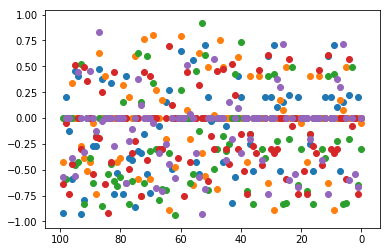

In [12]:
# WORKING

#news_scores['@BBCNorthAmerica'][1]['score']

for key, value in news_scores.items():
    score_list = []
    time_list = []
    for x in range(len(value)):
        score_list.append(news_scores[key][x]['score'])
        time_list.append(x)
    plt.scatter(time_list, score_list)
    plt.gca().invert_xaxis()
plt.show()

In [35]:
composite = {}

for key, value in news_scores.items():
    score_list = []
    for x in range(len(value)):
        score_list.append(news_scores[key][x]['score'])
    mean_score = float("{0:.2f}".format(np.mean(score_list)))
    composite[key] = mean_score
    
temp = pd.Series(composite)
temp = temp.reset_index().rename(columns={'index':'Twitter Name',0:'Composite Score'})
temp

,Twitter Name,Composite Score
0,@BBCNorthAmerica,-0.10
1,@CBSNews,-0.12
2,@CNN,-0.02
3,@FoxNews,-0.20
4,@nytimes,-0.05


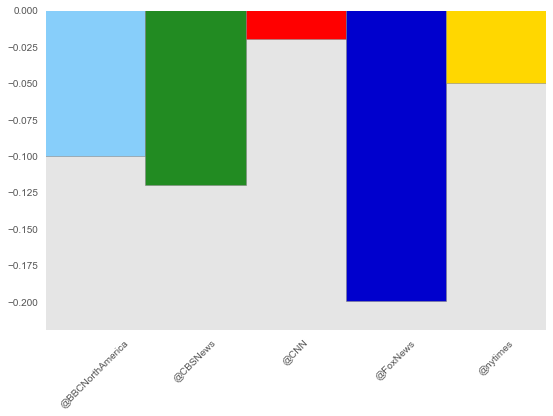

In [87]:
x_axis = np.arange(0, len(composite), 1)
tick_loc = [x+0.5 for x in x_axis]
colors = ['#87CEFA','#228B22','#FF0000','#0000CD','#FFD700']

plt.style.use('ggplot')
plt.bar(x_axis, temp['Composite Score'], align='edge', width=1.0, color=colors, edgecolor='gray')
plt.xticks(tick_loc, temp['Twitter Name'], rotation=45)
plt.ylim(-0.22, 0)
plt.margins(0, 0.1)
plt.grid(False)
plt.show()

In [45]:
#-------------TESTING BELOW-----------------------#

In [41]:
# TESTING NEW STUFF

targets = ['@nytimes','@CNN','@FoxNews','@CBSNews','@BBCNorthAmerica']

news_scores = {}

for name in targets:
    tweet_sentiment = []
    for item in tweeter(name):
        tweet = {}

        tweet['retweets'] = item['retweet_count']
        tweet['favorites'] = item['favorite_count']
        tweet['score'] = vader(item)
        tweet_sentiment.append(tweet)
    news_scores[name] = tweet_sentiment

In [37]:
news_scores

{'@nytimes': [{'favorites': 84, 'retweets': 22, 'score': 0.0},
  {'favorites': 38, 'retweets': 35, 'score': -0.5994},
  {'favorites': 149, 'retweets': 59, 'score': 0.2732},
  {'favorites': 0, 'retweets': 18, 'score': 0.0},
  {'favorites': 1035, 'retweets': 888, 'score': 0.0},
  {'favorites': 0, 'retweets': 49, 'score': 0.5106},
  {'favorites': 354, 'retweets': 193, 'score': -0.6124},
  {'favorites': 0, 'retweets': 48, 'score': 0.1511},
  {'favorites': 225, 'retweets': 210, 'score': -0.4767},
  {'favorites': 255, 'retweets': 246, 'score': 0.8442},
  {'favorites': 107, 'retweets': 36, 'score': 0.0},
  {'favorites': 0, 'retweets': 85, 'score': 0.5994},
  {'favorites': 134, 'retweets': 65, 'score': -0.1027},
  {'favorites': 1304, 'retweets': 238, 'score': -0.4215},
  {'favorites': 113, 'retweets': 50, 'score': 0.0},
  {'favorites': 430, 'retweets': 221, 'score': -0.3612},
  {'favorites': 0, 'retweets': 232, 'score': 0.0},
  {'favorites': 223, 'retweets': 91, 'score': 0.4588},
  {'favorites

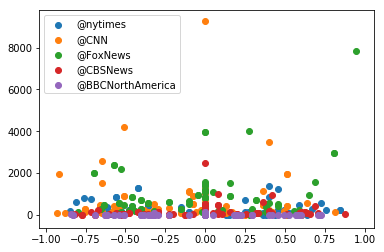

In [44]:
for key, value in news_scores.items():
    score_list = []
    fav_list = []

    for x in range(len(value)):
        score_list.append(news_scores[key][x]['score'])
        fav_list.append(news_scores[key][x]['favorites'])
    plt.scatter(score_list, fav_list)
    #plt.gca().invert_xaxis()
plt.legend(targets)
plt.show()

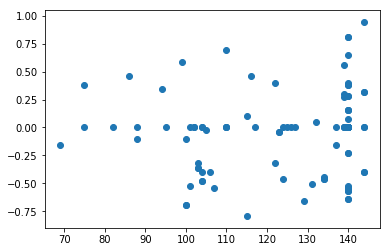

In [31]:
score_list = []
time_list = []
cnn = news_scores['@FoxNews']

for x in range(len(cnn)):
    score_list.append(cnn[x]['score'])
    time_list.append(cnn[x]['textlength'])
plt.scatter(time_list, score_list)
plt.show()

In [25]:
len(news_scores['@CNN'])

100

In [34]:
print(json.dumps(tweeter('@nytimes'),sort_keys=True, indent=4))

[
    {
        "contributors": null,
        "coordinates": null,
        "created_at": "Tue Nov 28 05:12:32 +0000 2017",
        "entities": {
            "hashtags": [],
            "symbols": [],
            "urls": [
                {
                    "display_url": "nyti.ms/2BqREcG",
                    "expanded_url": "http://nyti.ms/2BqREcG",
                    "indices": [
                        113,
                        136
                    ],
                    "url": "https://t.co/WdPNQgFb7L"
                }
            ],
            "user_mentions": []
        },
        "favorite_count": 10,
        "favorited": false,
        "geo": null,
        "id": 935375838417170432,
        "id_str": "935375838417170432",
        "in_reply_to_screen_name": null,
        "in_reply_to_status_id": null,
        "in_reply_to_status_id_str": null,
        "in_reply_to_user_id": null,
        "in_reply_to_user_id_str": null,
        "is_quote_status": false,
        "lang"